## TASK 3

## Pizza Place Sales

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Setup
warnings.filterwarnings('ignore')
pd.set_option('display.max_colwidth', None)
%matplotlib inline

## Load CSV files

In [105]:
# Load Order Details

order_details = pd.read_csv('order_details.csv')
order_details.head()

,order_details_id,order_id,pizza_id,quantity
0,1,1,hawaiian_m,1
1,2,2,classic_dlx_m,1
2,3,2,five_cheese_l,1
3,4,2,ital_supr_l,1
4,5,2,mexicana_m,1


In [106]:
order_details.shape

(48620, 4)

In [107]:
# Load Order 

order = pd.read_csv('orders.csv')
order.head()

,order_id,date,time
0,1,2015-01-01,11:38:36
1,2,2015-01-01,11:57:40
2,3,2015-01-01,12:12:28
3,4,2015-01-01,12:16:31
4,5,2015-01-01,12:21:30


In [108]:
order.shape

(21350, 3)

In [109]:
# Load Pizza Types

pizza_type = pd.read_csv('pizza_types.csv', encoding='utf-8-sig')
pizza_type.head()

,pizza_type_id,name,category,ingredients
0,bbq_ckn,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce"
1,cali_ckn,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese"
2,ckn_alfredo,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, Asiago Cheese, Alfredo Sauce"
3,ckn_pesto,The Chicken Pesto Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Spinach, Garlic, Pesto Sauce"
4,southw_ckn,The Southwest Chicken Pizza,Chicken,"Chicken, Tomatoes, Red Peppers, Red Onions, Jalapeno Peppers, Corn, Cilantro, Chipotle Sauce"


In [110]:
pizza_type.shape

(32, 4)

In [111]:
# Load Pizzas

pizza = pd.read_csv('pizzas.csv')
pizza.head()

,pizza_id,pizza_type_id,size,price
0,bbq_ckn_s,bbq_ckn,S,12.75
1,bbq_ckn_m,bbq_ckn,M,16.75
2,bbq_ckn_l,bbq_ckn,L,20.75
3,cali_ckn_s,cali_ckn,S,12.75
4,cali_ckn_m,cali_ckn,M,16.75


In [112]:
pizza.shape

(96, 4)

In [113]:
# Load Data Dictionary

data_dict = pd.read_csv('/home/21641c6c-03a7-4e5c-9add-5a5e308aba8d/pizza_sales/pizza_sales/data_dictionary.csv')
pd.set_option('display.max_colwidth', None)  # Display full description
data_dict

,Table,Field,Description
0,orders,order_id,Unique identifier for each order placed by a table
1,orders,date,Date the order was placed (entered into the system prior to cooking & serving)
2,orders,time,Time the order was placed (entered into the system prior to cooking & serving)
3,order_details,order_details_id,"Unique identifier for each pizza placed within each order (pizzas of the same type and size are kept in the same row, and the quantity increases)"
4,order_details,order_id,Foreign key that ties the details in each order to the order itself
5,order_details,pizza_id,"Foreign key that ties the pizza ordered to its details, like size and price"
6,order_details,quantity,Quantity ordered for each pizza of the same type and size
7,pizzas,pizza_id,Unique identifier for each pizza (constituted by its type and size)
8,pizzas,pizza_type_id,Foreign key that ties each pizza to its broader pizza type
9,pizzas,size,"Size of the pizza (Small, Medium, Large, X Large, or XX Large)"


## Merge Datasets

In [114]:
# Final Order Details

final_order_details = pd.merge(order_details, order, on='order_id', how='left')
final_order_details.head()

,order_details_id,order_id,pizza_id,quantity,date,time
0,1,1,hawaiian_m,1,2015-01-01,11:38:36
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40
2,3,2,five_cheese_l,1,2015-01-01,11:57:40
3,4,2,ital_supr_l,1,2015-01-01,11:57:40
4,5,2,mexicana_m,1,2015-01-01,11:57:40


In [115]:
# Final Pizza

final_pizza = pd.merge(pizza, pizza_type, on='pizza_type_id', how='left')
final_pizza.head()

,pizza_id,pizza_type_id,size,price,name,category,ingredients
0,bbq_ckn_s,bbq_ckn,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce"
1,bbq_ckn_m,bbq_ckn,M,16.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce"
2,bbq_ckn_l,bbq_ckn,L,20.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce"
3,cali_ckn_s,cali_ckn,S,12.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese"
4,cali_ckn_m,cali_ckn,M,16.75,The California Chicken Pizza,Chicken,"Chicken, Artichoke, Spinach, Garlic, Jalapeno Peppers, Fontina Cheese, Gouda Cheese"


In [116]:
final_pizza.isnull().sum()

pizza_id         0
pizza_type_id    0
size             0
price            0
name             0
category         0
ingredients      0
dtype: int64

In [117]:
# Load Data Frame

df=pd.merge(final_order_details, final_pizza, on='pizza_id', how='left')
df.head()

,order_details_id,order_id,pizza_id,quantity,date,time,pizza_type_id,size,price,name,category,ingredients
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon"
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic"
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic"
4,5,2,mexicana_m,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic"


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   order_details_id  48620 non-null  int64  
 1   order_id          48620 non-null  int64  
 2   pizza_id          48620 non-null  object 
 3   quantity          48620 non-null  int64  
 4   date              48620 non-null  object 
 5   time              48620 non-null  object 
 6   pizza_type_id     48620 non-null  object 
 7   size              48620 non-null  object 
 8   price             48620 non-null  float64
 9   name              48620 non-null  object 
 10  category          48620 non-null  object 
 11  ingredients       48620 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 4.5+ MB


In [119]:
print(df.columns)

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'date', 'time',
       'pizza_type_id', 'size', 'price', 'name', 'category', 'ingredients'],
      dtype='object')


In [120]:
df.drop(['order_details_id', 'pizza_id'], axis=1, inplace=True, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   order_id       48620 non-null  int64  
 1   quantity       48620 non-null  int64  
 2   date           48620 non-null  object 
 3   time           48620 non-null  object 
 4   pizza_type_id  48620 non-null  object 
 5   size           48620 non-null  object 
 6   price          48620 non-null  float64
 7   name           48620 non-null  object 
 8   category       48620 non-null  object 
 9   ingredients    48620 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 3.7+ MB


In [121]:
df.rename({'pizza_type_id':'pizza_id'}, axis=1, inplace=True)
df.head()

,order_id,quantity,date,time,pizza_id,size,price,name,category,ingredients
0,1,1,2015-01-01,11:38:36,hawaiian,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,1,2015-01-01,11:57:40,classic_dlx,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon"
2,2,1,2015-01-01,11:57:40,five_cheese,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic"
3,2,1,2015-01-01,11:57:40,ital_supr,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic"
4,2,1,2015-01-01,11:57:40,mexicana,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic"


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     48620 non-null  int64  
 1   quantity     48620 non-null  int64  
 2   date         48620 non-null  object 
 3   time         48620 non-null  object 
 4   pizza_id     48620 non-null  object 
 5   size         48620 non-null  object 
 6   price        48620 non-null  float64
 7   name         48620 non-null  object 
 8   category     48620 non-null  object 
 9   ingredients  48620 non-null  object 
dtypes: float64(1), int64(2), object(7)
memory usage: 3.7+ MB


## Clean Data

In [123]:
# Drop unnecessary columns

df.drop(['order_details_id', 'pizza_id'], axis=1, inplace=True, errors='ignore')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     48620 non-null  int64  
 1   quantity     48620 non-null  int64  
 2   date         48620 non-null  object 
 3   time         48620 non-null  object 
 4   size         48620 non-null  object 
 5   price        48620 non-null  float64
 6   name         48620 non-null  object 
 7   category     48620 non-null  object 
 8   ingredients  48620 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.3+ MB


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     48620 non-null  int64  
 1   quantity     48620 non-null  int64  
 2   date         48620 non-null  object 
 3   time         48620 non-null  object 
 4   size         48620 non-null  object 
 5   price        48620 non-null  float64
 6   name         48620 non-null  object 
 7   category     48620 non-null  object 
 8   ingredients  48620 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.3+ MB


In [125]:
df.rename({'pizza_type_id':'pizza_id'}, axis=1, inplace=True)
df.head()

,order_id,quantity,date,time,size,price,name,category,ingredients
0,1,1,2015-01-01,11:38:36,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,1,2015-01-01,11:57:40,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon"
2,2,1,2015-01-01,11:57:40,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic"
3,2,1,2015-01-01,11:57:40,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic"
4,2,1,2015-01-01,11:57:40,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic"


In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   order_id     48620 non-null  int64  
 1   quantity     48620 non-null  int64  
 2   date         48620 non-null  object 
 3   time         48620 non-null  object 
 4   size         48620 non-null  object 
 5   price        48620 non-null  float64
 6   name         48620 non-null  object 
 7   category     48620 non-null  object 
 8   ingredients  48620 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.3+ MB


In [127]:
# Rename columns for clarity

df.rename({'quantity':'pizza_quantity',
           'date':'order_date',
           'time':'order_time',
           'size':'pizza_size',
           'price':'pizza_price',
           'name':'pizza_name',
           'category':'pizza_category',
           'ingredients':'pizza_ingredients'}, axis=1, inplace=True)
df.head()

,order_id,pizza_quantity,order_date,order_time,pizza_size,pizza_price,pizza_name,pizza_category,pizza_ingredients
0,1,1,2015-01-01,11:38:36,M,13.25,The Hawaiian Pizza,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese"
1,2,1,2015-01-01,11:57:40,M,16.00,The Classic Deluxe Pizza,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers, Bacon"
2,2,1,2015-01-01,11:57:40,L,18.50,The Five Cheese Pizza,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Gouda Cheese, Romano Cheese, Blue Cheese, Garlic"
3,2,1,2015-01-01,11:57:40,L,20.75,The Italian Supreme Pizza,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Onions, Green Olives, Garlic"
4,2,1,2015-01-01,11:57:40,M,16.00,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic"


In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   order_id           48620 non-null  int64  
 1   pizza_quantity     48620 non-null  int64  
 2   order_date         48620 non-null  object 
 3   order_time         48620 non-null  object 
 4   pizza_size         48620 non-null  object 
 5   pizza_price        48620 non-null  float64
 6   pizza_name         48620 non-null  object 
 7   pizza_category     48620 non-null  object 
 8   pizza_ingredients  48620 non-null  object 
dtypes: float64(1), int64(2), object(6)
memory usage: 3.3+ MB


## Most Preferred Pizza Sizes

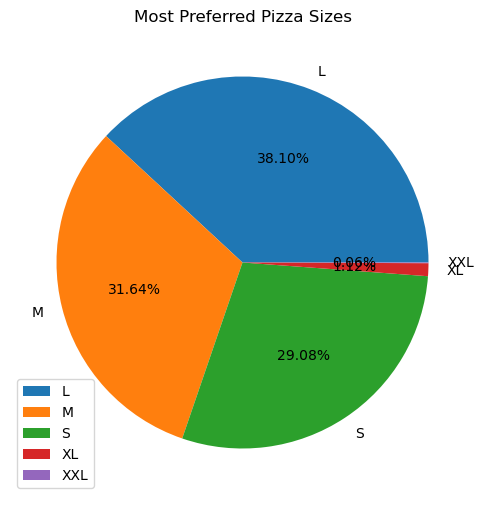

In [129]:
preferred_sizes = df['pizza_size'].value_counts()
preferred_sizes.plot.pie(autopct='%1.2f%%', figsize=(6, 10), title='Most Preferred Pizza Sizes')
plt.ylabel('')
plt.legend(loc='lower left')
plt.show()

## Add Month Column for Monthly Analysis

In [130]:
df['order_date'] = pd.to_datetime(df['order_date'])
df['order_month'] = df['order_date'].dt.month
df.tail()

,order_id,pizza_quantity,order_date,order_time,pizza_size,pizza_price,pizza_name,pizza_category,pizza_ingredients,order_month
48615,21348,1,2015-12-31,21:23:10,M,16.75,The Chicken Alfredo Pizza,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, Asiago Cheese, Alfredo Sauce",12
48616,21348,1,2015-12-31,21:23:10,L,17.95,The Four Cheese Pizza,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mozzarella Cheese, Parmigiano Reggiano Cheese, Garlic",12
48617,21348,1,2015-12-31,21:23:10,S,12.00,The Napolitana Pizza,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions, Garlic",12
48618,21349,1,2015-12-31,22:09:54,L,20.25,The Mexicana Pizza,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red Onions, Cilantro, Corn, Chipotle Sauce, Garlic",12
48619,21350,1,2015-12-31,23:02:05,S,12.75,The Barbecue Chicken Pizza,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers, Tomatoes, Red Onions, Barbecue Sauce",12


## 1. Total Revenue/Sales

In [131]:
# Total Revenue/Sales

total_revenue = (df['pizza_quantity'] * df['pizza_price']).sum()
print("Total Revenue:", total_revenue)

Total Revenue: 817860.05


## 2. Total Quantity Sold

In [132]:
# Total Quantity Sold

total_quantity = df['pizza_quantity'].sum()
print("Total Quantity Sold:", total_quantity)

Total Quantity Sold: 49574


## 3. Total Orders

In [133]:
# Total Orders

total_orders = df['order_id'].nunique()
print("Total Orders:", total_orders)

Total Orders: 21350


## 4. Number of Pizza Types

In [134]:
# Number of Pizza Types

total_pizza_category = df['pizza_category'].nunique()
print("Total Pizza Category:", total_pizza_category)

Total Pizza Category: 4


## 5. Average Price of Pizzas

In [135]:
# Average Price of Pizzas

average_pizza_price = df['pizza_price'].mean()
print("Average Pizza Price:", average_pizza_price)

Average Pizza Price: 16.494132044426163


## 6. Peak Sale Hours

In [136]:
df['order_time'] = pd.to_datetime(df['order_time'])
df['hour']= df['order_time'].dt.hour
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_id           48620 non-null  int64         
 1   pizza_quantity     48620 non-null  int64         
 2   order_date         48620 non-null  datetime64[ns]
 3   order_time         48620 non-null  datetime64[ns]
 4   pizza_size         48620 non-null  object        
 5   pizza_price        48620 non-null  float64       
 6   pizza_name         48620 non-null  object        
 7   pizza_category     48620 non-null  object        
 8   pizza_ingredients  48620 non-null  object        
 9   order_month        48620 non-null  int32         
 10  hour               48620 non-null  int32         
dtypes: datetime64[ns](2), float64(1), int32(2), int64(2), object(4)
memory usage: 3.7+ MB


In [137]:
# Peak order time 

df3 = (df['hour'].value_counts(normalize=True)*100).reset_index().rename({'index':'hour', 'hour':'percentage'},axis=1)
df3

,percentage,proportion
0,12,13.457425
1,13,12.758124
2,18,11.022213
3,17,10.577951
4,19,8.946935
5,16,8.607569
6,14,7.241876
7,20,7.171946
8,15,6.519951
9,11,5.495681


In [138]:
print(df3.columns)

Index(['percentage', 'proportion'], dtype='object')


In [139]:
# Extract hour from the order_time column

df['hour'] = pd.to_datetime(df['order_time']).dt.hour

# Group by hour and calculate Sales Percentage 

hourly_sales = df.groupby('hour')['pizza_quantity'].sum()
total_sales = hourly_sales.sum()
df3 = pd.DataFrame({
    'hour': hourly_sales.index,
    'percentage': (hourly_sales / total_sales * 100).round(2)
})

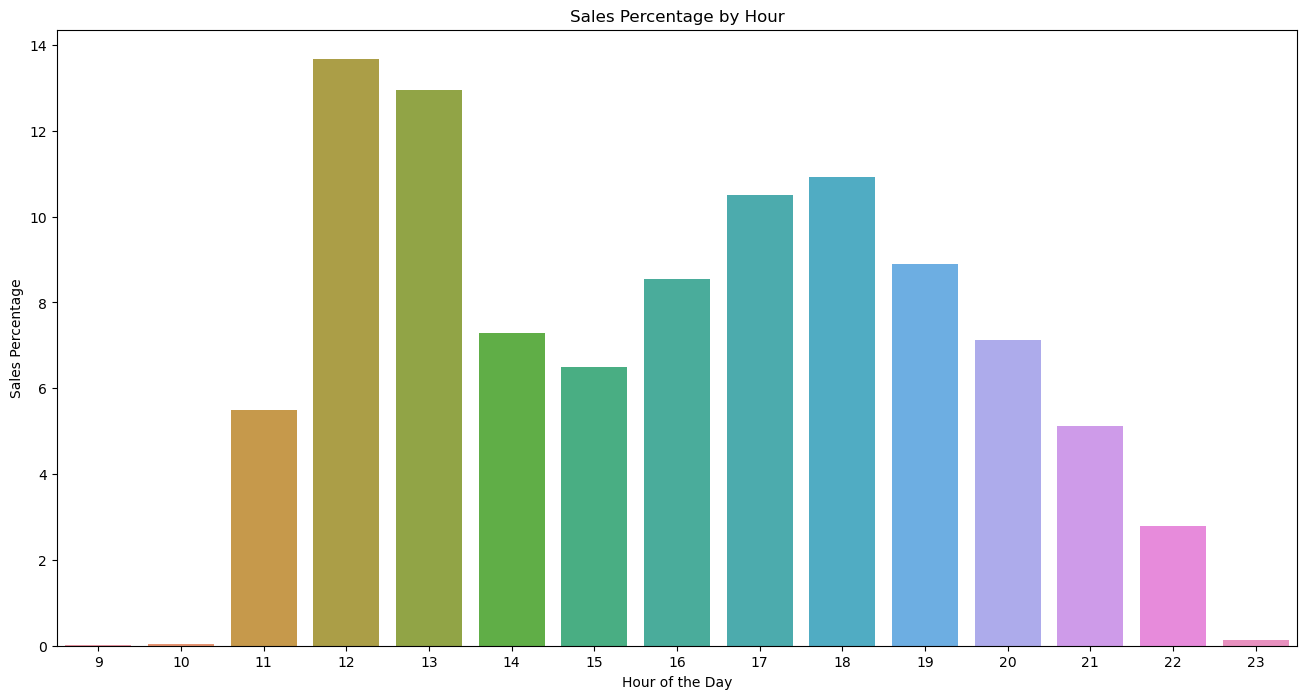

In [140]:
plt.figure(figsize=[16, 8])
sns.barplot(data=df3, x='hour', y='percentage')
plt.title("Sales Percentage by Hour")
plt.xlabel("Hour of the Day")
plt.ylabel("Sales Percentage")
plt.show()

## 7. Total Daily Sales

In [141]:
# Total Daily Sales

df['weekday_name'] = pd.to_datetime(df['order_date']).dt.day_name()

weekday_sales = df.groupby('weekday_name').apply(lambda x: (x['pizza_quantity'] * x['pizza_price']).sum())
weekday_sales = weekday_sales.sort_values(ascending=False)

print("Sales per Day:\n", weekday_sales)
print("Best Sales Day:", weekday_sales.idxmax())

Sales per Day:
 weekday_name
Friday       136073.90
Thursday     123528.50
Saturday     123182.40
Wednesday    114408.40
Tuesday      114133.80
Monday       107329.55
Sunday        99203.50
dtype: float64
Best Sales Day: Friday


## 8. Top 5 Bestselling Pizzas

In [142]:
# Top 5 Bestselling Pizzas

top_5_pizzas = df.groupby('pizza_name')['pizza_quantity'].sum().sort_values(ascending=False).head(5)
print("Top 5 Bestselling Pizzas:\n", top_5_pizzas)

Top 5 Bestselling Pizzas:
 pizza_name
The Classic Deluxe Pizza      2453
The Barbecue Chicken Pizza    2432
The Hawaiian Pizza            2422
The Pepperoni Pizza           2418
The Thai Chicken Pizza        2371
Name: pizza_quantity, dtype: int64


## 9. Monthly Sales

Monthly Sales:
 order_month
1     69793.30
2     65159.60
3     70397.10
4     68736.80
5     71402.75
6     68230.20
7     72557.90
8     68278.25
9     64180.05
10    64027.60
11    70395.35
12    64701.15
dtype: float64


<Axes: title={'center': 'Monthly Sales Trend'}, xlabel='order_month'>

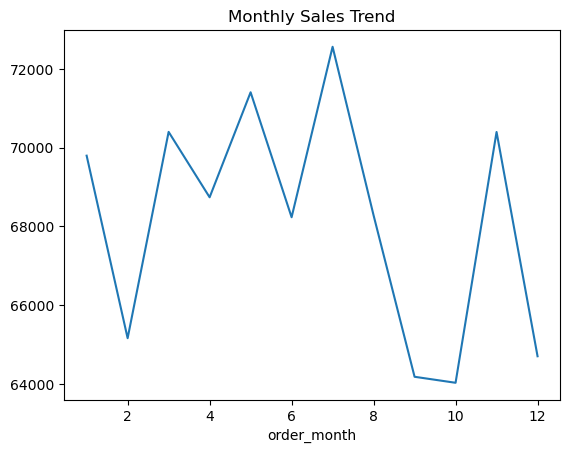

In [143]:
# Monthly Sales

monthly_sales = df.groupby('order_month').apply(lambda x: (x['pizza_quantity'] * x['pizza_price']).sum())
print("Monthly Sales:\n", monthly_sales)

# Show plot:
monthly_sales.plot(kind='line', title='Monthly Sales Trend')

## 10. Low-Performing Pizzas

In [144]:
# Low-Performing Pizzas

low_performing_pizzas = df.groupby('pizza_name')['pizza_quantity'].sum().sort_values().head(5)
print("Low Performing Pizzas:\n", low_performing_pizzas)

Low Performing Pizzas:
 pizza_name
The Brie Carre Pizza         490
The Mediterranean Pizza      934
The Calabrese Pizza          937
The Spinach Supreme Pizza    950
The Soppressata Pizza        961
Name: pizza_quantity, dtype: int64
